# The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network and understand the basics of Image Classification

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Read the data from the h5py file and understand the train/test splits (10 points)

In [26]:
import h5py

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [27]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [28]:
# checking shapes of data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [29]:
X_train[:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [30]:
y_train[:1]

array([2], dtype=uint8)

In [31]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [32]:
y_test[:1]

array([1], dtype=uint8)

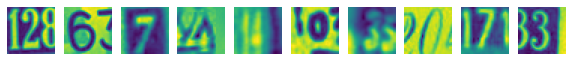

label for each of the above image:  [2 6 7 4 4 0 3 0 7 3]


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# visualizing the first n images of the dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()
print('label for each of the above image: ', y_train[0:10])

# Reshape and normalize the train and test features (10 points)

In [34]:
# normalizing data for feeding model
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# grayscale images and can take values from 0-255
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('Resized Training and Test sets :')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Resized Training and Test sets :
(42000, 1024, 1)
(42000,)
(18000, 1024, 1)
(18000,)


# One hot encode the labels for train and test data (10 points)

In [35]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Number of classes are', y_test.shape[1])

Number of classes are 10


# Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax (10 points)

In [36]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# initializing model
model = Sequential()  
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation (10 points)

In [37]:
# compiling model
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit and evaluate the model. Print the loss and accuracy for the test data (10 points)

In [38]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=1)

Epoch 1/100
140/140 [==============================] - 3s 15ms/step - loss: 2.3110 - accuracy: 0.1025 - val_loss: 2.2892 - val_accuracy: 0.1434
Epoch 2/100
140/140 [==============================] - 2s 14ms/step - loss: 2.2307 - accuracy: 0.1615 - val_loss: 1.8765 - val_accuracy: 0.3196
Epoch 3/100
140/140 [==============================] - 2s 14ms/step - loss: 1.7749 - accuracy: 0.3633 - val_loss: 1.5603 - val_accuracy: 0.4648
Epoch 4/100
140/140 [==============================] - 2s 14ms/step - loss: 1.4944 - accuracy: 0.4998 - val_loss: 1.4359 - val_accuracy: 0.5111
Epoch 5/100
140/140 [==============================] - 2s 14ms/step - loss: 1.3853 - accuracy: 0.5398 - val_loss: 1.2809 - val_accuracy: 0.5877
Epoch 6/100
140/140 [==============================] - 2s 14ms/step - loss: 1.2914 - accuracy: 0.5820 - val_loss: 1.3287 - val_accuracy: 0.5572
Epoch 7/100
140/140 [==============================] - 2s 13ms/step - loss: 1.2512 - accuracy: 0.5984 - val_loss: 1.2009 - val_accuracy:

In [39]:
results = model.evaluate(X_test, y_test, batch_size=128)
print('Test loss :', results[0])
print('Test accuracy :', results[1])

141/141 [==============================] - 1s 4ms/step - loss: 0.6780 - accuracy: 0.8064
Test loss : 0.6780170202255249
Test accuracy : 0.8063889145851135
